## DENCE NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU


from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.12.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2000 images belonging to 5 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 5 classes.


In [5]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model
     

input_shape = 224, 224, 3
n_classes = 7

K.clear_session()
model = densenet(input_shape, n_classes)
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

                                                                                                  
 conv2d_9 (Conv2D)              (None, 56, 56, 128)  24704       ['re_lu_8[0][0]']                
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 56, 56, 128)  512        ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 re_lu_9 (ReLU)                 (None, 56, 56, 128)  0           ['batch_normalization_9[0][0]']  
                                                                                                  
 conv2d_10 (Conv2D)             (None, 56, 56, 32)   36896       ['re_lu_9[0][0]']                
                                                                                                  
 concatena

                                                                                                  
 re_lu_18 (ReLU)                (None, 28, 28, 128)  0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 32)   36896       ['re_lu_18[0][0]']               
                                                                                                  
 concatenate_8 (Concatenate)    (None, 28, 28, 224)  0           ['concatenate_7[0][0]',          
                                                                  'conv2d_19[0][0]']              
                                                                                                  
 batch_normalization_19 (BatchN  (None, 28, 28, 224)  896        ['concatenate_8[0][0]']          
 ormalization)                                                                                    
          

 batch_normalization_28 (BatchN  (None, 28, 28, 128)  512        ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_28 (ReLU)                (None, 28, 28, 128)  0           ['batch_normalization_28[0][0]'] 
                                                                                                  
 conv2d_29 (Conv2D)             (None, 28, 28, 32)   36896       ['re_lu_28[0][0]']               
                                                                                                  
 concatenate_13 (Concatenate)   (None, 28, 28, 384)  0           ['concatenate_12[0][0]',         
                                                                  'conv2d_29[0][0]']              
                                                                                                  
 batch_nor

 conv2d_38 (Conv2D)             (None, 28, 28, 256)  131328      ['re_lu_37[0][0]']               
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 14, 14, 256)  0          ['conv2d_38[0][0]']              
 oling2D)                                                                                         
                                                                                                  
 batch_normalization_38 (BatchN  (None, 14, 14, 256)  1024       ['average_pooling2d_1[0][0]']    
 ormalization)                                                                                    
                                                                                                  
 re_lu_38 (ReLU)                (None, 14, 14, 256)  0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 conv2d_39

 re_lu_47 (ReLU)                (None, 14, 14, 128)  0           ['batch_normalization_47[0][0]'] 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 14, 14, 32)   36896       ['re_lu_47[0][0]']               
                                                                                                  
 concatenate_22 (Concatenate)   (None, 14, 14, 416)  0           ['concatenate_21[0][0]',         
                                                                  'conv2d_48[0][0]']              
                                                                                                  
 batch_normalization_48 (BatchN  (None, 14, 14, 416)  1664       ['concatenate_22[0][0]']         
 ormalization)                                                                                    
                                                                                                  
 re_lu_48 

 ormalization)                                                                                    
                                                                                                  
 re_lu_57 (ReLU)                (None, 14, 14, 128)  0           ['batch_normalization_57[0][0]'] 
                                                                                                  
 conv2d_58 (Conv2D)             (None, 14, 14, 32)   36896       ['re_lu_57[0][0]']               
                                                                                                  
 concatenate_27 (Concatenate)   (None, 14, 14, 576)  0           ['concatenate_26[0][0]',         
                                                                  'conv2d_58[0][0]']              
                                                                                                  
 batch_normalization_58 (BatchN  (None, 14, 14, 576)  2304       ['concatenate_27[0][0]']         
 ormalizat

                                                                                                  
 batch_normalization_67 (BatchN  (None, 14, 14, 128)  512        ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_67 (ReLU)                (None, 14, 14, 128)  0           ['batch_normalization_67[0][0]'] 
                                                                                                  
 conv2d_68 (Conv2D)             (None, 14, 14, 32)   36896       ['re_lu_67[0][0]']               
                                                                                                  
 concatenate_32 (Concatenate)   (None, 14, 14, 736)  0           ['concatenate_31[0][0]',         
                                                                  'conv2d_68[0][0]']              
          

                                                                                                  
 conv2d_77 (Conv2D)             (None, 14, 14, 128)  110720      ['re_lu_76[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 14, 14, 128)  512        ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_77 (ReLU)                (None, 14, 14, 128)  0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 14, 14, 32)   36896       ['re_lu_77[0][0]']               
                                                                                                  
 concatena

                                                                                                  
 re_lu_86 (ReLU)                (None, 14, 14, 1024  0           ['batch_normalization_86[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_87 (Conv2D)             (None, 14, 14, 512)  524800      ['re_lu_86[0][0]']               
                                                                                                  
 average_pooling2d_2 (AveragePo  (None, 7, 7, 512)   0           ['conv2d_87[0][0]']              
 oling2D)                                                                                         
                                                                                                  
 batch_normalization_87 (BatchN  (None, 7, 7, 512)   2048        ['average_pooling2d_2[0][0]']    
 ormalizat

                                                                                                  
 batch_normalization_96 (BatchN  (None, 7, 7, 128)   512         ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_96 (ReLU)                (None, 7, 7, 128)    0           ['batch_normalization_96[0][0]'] 
                                                                                                  
 conv2d_97 (Conv2D)             (None, 7, 7, 32)     36896       ['re_lu_96[0][0]']               
                                                                                                  
 concatenate_46 (Concatenate)   (None, 7, 7, 672)    0           ['concatenate_45[0][0]',         
                                                                  'conv2d_97[0][0]']              
          

                                                                                                  
 conv2d_106 (Conv2D)            (None, 7, 7, 128)    102528      ['re_lu_105[0][0]']              
                                                                                                  
 batch_normalization_106 (Batch  (None, 7, 7, 128)   512         ['conv2d_106[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 re_lu_106 (ReLU)               (None, 7, 7, 128)    0           ['batch_normalization_106[0][0]']
                                                                                                  
 conv2d_107 (Conv2D)            (None, 7, 7, 32)     36896       ['re_lu_106[0][0]']              
                                                                                                  
 concatena

                                                                                                  
 re_lu_115 (ReLU)               (None, 7, 7, 960)    0           ['batch_normalization_115[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 7, 7, 128)    123008      ['re_lu_115[0][0]']              
                                                                                                  
 batch_normalization_116 (Batch  (None, 7, 7, 128)   512         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 re_lu_116 (ReLU)               (None, 7, 7, 128)    0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_11

In [6]:
model_path = "DENCE.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 50
batch_size = 512

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 2.9839 - accuracy: 0.3125 - precision: 0.4531     
Epoch 1: accuracy improved from -inf to 0.31250, saving model to DENCE.h5
3/3 [==============================] - 90s 18s/step - loss: 2.9839 - accuracy: 0.3125 - precision: 0.4531 - val_loss: 1.6976 - val_accuracy: 0.2083 - val_precision: 0.0000e+00
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 1.0118 - accuracy: 0.7500 - precision: 0.7553 
Epoch 2: accuracy improved from 0.31250 to 0.75000, saving model to DENCE.h5
3/3 [==============================] - 44s 16s/step - loss: 1.0118 - accuracy: 0.7500 - precision: 0.7553 - val_loss: 4.0819 - val_accuracy: 0.2292 - val_precision: 0.2391
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.8390 - accuracy: 0.7708 - precision: 0.7849 
Epoch 3: accuracy improved from 0.75000 to 0.77083, saving model to DENCE.h5
3/3 [==============================] - 47s 17s/step - loss: 0.8390 - accuracy: 0.

Epoch 25/50
3/3 [==============================] - ETA: 0s - loss: 0.4353 - accuracy: 0.8750 - precision: 0.8737 
Epoch 25: accuracy improved from 0.83333 to 0.87500, saving model to DENCE.h5
3/3 [==============================] - 44s 16s/step - loss: 0.4353 - accuracy: 0.8750 - precision: 0.8737 - val_loss: 4.9225 - val_accuracy: 0.1979 - val_precision: 0.1978
Epoch 26/50
3/3 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.7604 - precision: 0.7684 
Epoch 26: accuracy did not improve from 0.87500
3/3 [==============================] - 42s 15s/step - loss: 0.4873 - accuracy: 0.7604 - precision: 0.7684 - val_loss: 3.6856 - val_accuracy: 0.3021 - val_precision: 0.2857
Epoch 27/50
3/3 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.6354 - precision: 0.6489 
Epoch 27: accuracy did not improve from 0.87500
3/3 [==============================] - 42s 15s/step - loss: 0.8568 - accuracy: 0.6354 - precision: 0.6489 - val_loss: 3.6969 - val_accuracy:

3/3 [==============================] - ETA: 0s - loss: 0.2328 - accuracy: 0.8875 - precision: 0.8861
Epoch 49: accuracy did not improve from 0.94792
3/3 [==============================] - 43s 14s/step - loss: 0.2328 - accuracy: 0.8875 - precision: 0.8861 - val_loss: 7.1945 - val_accuracy: 0.3438 - val_precision: 0.3438
Epoch 50/50
3/3 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.8958 - precision: 0.8958 
Epoch 50: accuracy did not improve from 0.94792
3/3 [==============================] - 47s 17s/step - loss: 0.2583 - accuracy: 0.8958 - precision: 0.8958 - val_loss: 4.1310 - val_accuracy: 0.3333 - val_precision: 0.3333


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

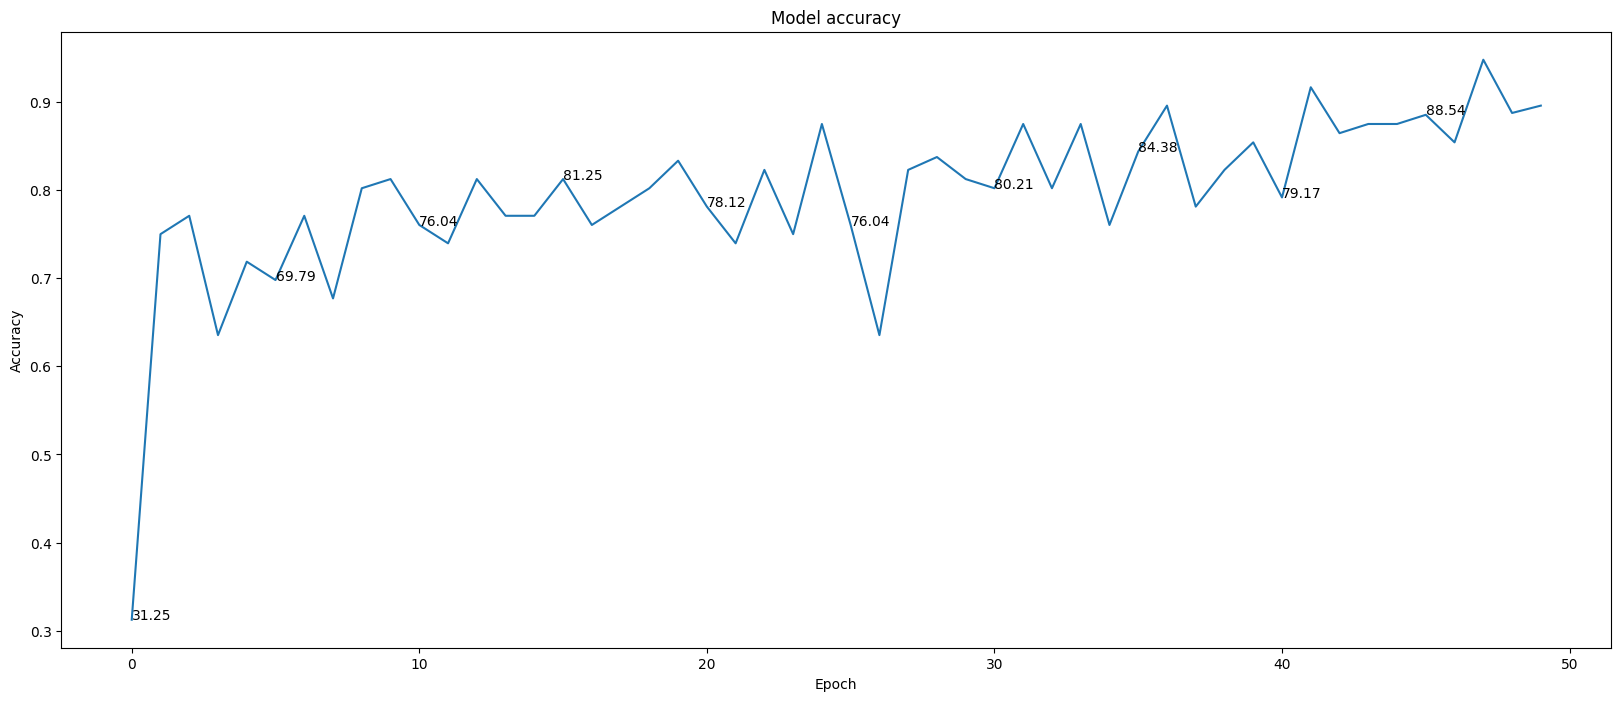

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

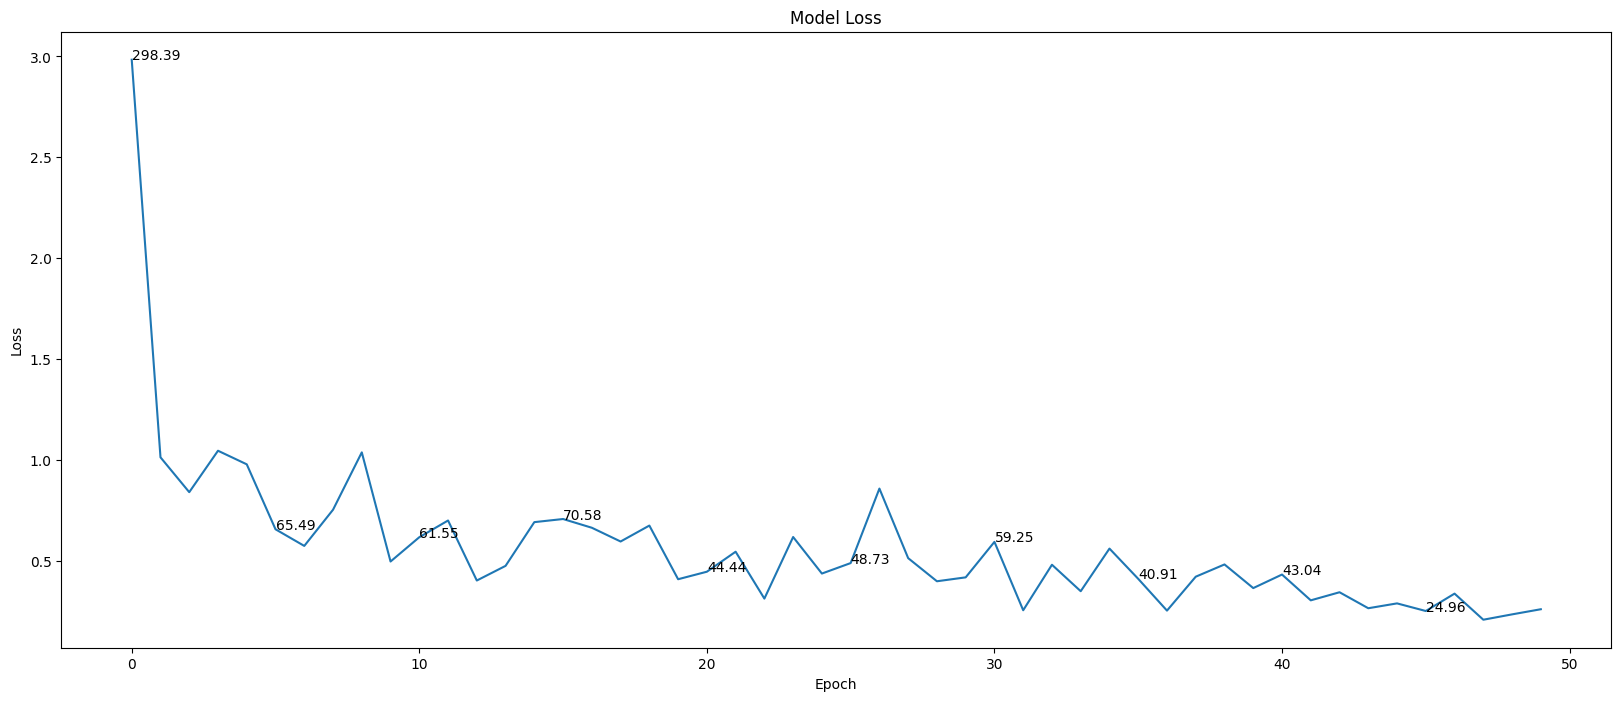

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()